<a href="https://colab.research.google.com/github/pietroventurini/machine-learning-notes/blob/master/4%20-%20Regularization%20in%20supervised%20learning%20models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regularization in supervised learning models




### Contents

1. [**L1 regularization**](#L1-regularization)  
2. [**L2 regularization**](#L2-regularization)  
3. [**Regularization in Python**](#Regularization-in-Python)  
    3.1. L2 regularization  
    3.2. L1 regularization  
    3.3. Early stopping  
    3.4. BGD with Lasso vs. Ridge regularization  

Regularization is a technique to cope with over-fitting.  If we use a model that is too complicated, we give it the opportunity to fit to the noise in the training data, often at the cost of making the model perform badly on test data. 

A regularization term (or regularizer) $R(f)$ is added to a loss function: 

$$\min_{f} \sum_{i=1}^{n} {V(f(x_i, y_i}) + \alpha R(f)$$

where $V$ is an underlying cost function that describes the cost of predicting $f(x)$ when the label is $y$, such as the square loss. The parameter $\alpha \in \mathbb{R}^+$ controls the importance of the regularization term.

## L1 Regularization


$l_1$ regularization, also called *lasso* (least absolute shrinkage and selection operator) regularization, consists into solving

$$\min_{\theta_0, \theta} \left\{\sum_{i=1}^{N} {(y_i - \theta_0 - x_i^\top \theta)^2} \right\} \text{ subject to } \sum_{j=1}^{p} |\theta_j| \le t$$

where:
- $N$: size of sample.
- $p$: number of covariates in each sample.
- $y_i$: outcome of the *i*-th sample.
- $x_i := (x_1,\dots, x_p)^\top$ is the covariate vector for the *i*-th case.
- $t$ is a prespecified free parameter that determines the amount of regularization.

The resulting estimate for $\theta_0$ is $\hat{\theta}_0 = \bar{y} - \bar{x}^\top\theta$. Consequently, the residual

$$y_i - \hat{\theta}_0 - x_i^\top \theta = (y_i - \bar{y}) - (x_i - \bar{x})^\top \theta.$$

If we work with standardized variables, then $\bar{x}=0$, $\bar{y}=0$, and both [the covariate and the response](https://en.wikipedia.org/wiki/Dependent_and_independent_variables#Statistics_synonyms) have unit variance.

The constrained regression problem can be rewritten in the Lagrangian form:

$$\min_{\theta \in \mathbb{R}^p} \left\{ \frac{1}{N} \left\lVert Y - X\theta\right\rVert_2^2 + \alpha \left\lVert \theta \right\rVert_1 \right\}$$

where:
- $\lVert u \rVert_p = \left(\sum_{i=1}^{N} \lvert u_i \rvert^p \right)^{\frac{1}{p}}$ is the standard $l^p$ norm. In L1 regularization, it is the Manatthan, or $l^1$ norm.
- $X$ is the covariate matrix, such that $X_{ij} = (x_i)_j$ and $x_i^\top$ is the *i*-th row of $X$.
- the exact relationship between $t$ and $\alpha$ is data dependent.

### Example
Consider two model, one simpler and one more complex:

$$3x_1+4x_2+5=0$$

$$2x_1^3-2x_1^2x_2-4x_2^3+3x_1^3+6x_1x_2+4x_2^2+5=0$$

Lasso regularization consists into taking the absolute values of the coefficients and adding them to the error of our model.

$$\text{Error}_1 = |3| + |4| = 7$$

$$\text{Error}_2 = |2| + |-2| + |-4| + |3| + |6| + |4| = 21$$

### Observations
- $\alpha=0$ is equivalent to the Ordinary Least Squares (OLS) problem.
- A large value of $\alpha$ will make coefficients zero hence it will lead to under-fit.
- L1 regularization is computationally inefficient unless data is sparse.
- Consider a *one-dimensional* model. The derivative of L1 is a constant whose value is independent of parameter. We can think of the L1 derivative as a force that subtracts some constant value from the parameter every time. Since L1 has a discontinuity at $0$, subtractions results that cross $0$ become zeroed out. Therefore, L1 Gives us the ability of selecting features.

### Usages
- L1 regularization gives us sparse estimates. Namely, in a high dimensional space, we got mostly zeros and a small number of non-zero coefficients. This is useful, for example, when creating feature crosses, they can result into high-dimensional feature vectors, causing model size to become huge. In a high-dimensional sparse vector, it is preferrable to encourage weights to drop to exactly $0$ where possible.
- It incorporates variable selection to the modeling problem, consequently, if we have to score a large sample with our model, we can have a lot of computational savings since we don't have to compute features whose coefficient is $0$.

### Tips
- To avoid gradient descent from bouncing around the optimum at the end, we can gradually reduce the learning rate. It will still bounce, but the steps will be smaller and smaller.
- Since the $l_1$ loss function is not differentiable at $0$, we can use a *subgradient vector* instead, when any $\theta_i=0$. In other words we can substitute $\lvert\theta_i\rvert$ with $\mathrm{sign}(\theta_i)$, where:

$$\mathrm{sign}(\theta_i) = \begin{cases}
-1 & \text{if }\theta_i < 0 \\
0 & \text{if }\theta_i = 0 \\
+1 & \text{if }\theta_i > 0 \\
 \end{cases}$$

## L2 Regularization

$l_2$ regularization, also called Ridge regression (or Tikhonov regularization), conisists into solving the following constrained minimization problem:

$$\min_{\theta} \left\lVert Y - X\theta  \right\rVert_2^2 + \alpha \left\lVert \theta \right \rVert_2^2$$

The closed form solution to the ridge regression problem is:

$$\hat{\theta} = \left(X^\top X + \alpha I\right)^{-1}X^\top Y$$

where $I$ is the identity matrix, but having the first diagonal element equal to zero, because the bias term $\theta_0$ is not regularized).

This type of regularization aims at reducing the model complexity, in order to attain low training error while balancing against complexity, preventing overfitting.



### Example
Consider two model, one simpler and one more complex:

$$3x_1+4x_2+5=0$$

$$2x_1^3-2x_1^2x_2-4x_2^3+3x_1^3+6x_1x_2+4x_2^2+5=0$$

$l_2$ regularization consists into taking the squared values of the coefficients, and adding them to the error of our model.

$$\text{Error} = 3^2 + 4^2 = 25$$

$$\text{Error} = 2^2 + (-2)^2 + (-4)^2 + 3^2 + 6^2 + 4^2 = 85$$

### Observations
- There exists applications that requires a small error in the model, so we it is ok if it is a complex model and so *punishment* on the complexity should be small. In other cases, simplicity is required, so we can accept errors in our model and so *punishment* on the complexity should be large. That *punishment* is regulated by the $\alpha$ parameter.
- L2 regularization is computationally efficient and better for unsparse data (uniformily distributed between columns).
- Differently from $l_1$ regularization, ridge regularization won't drive non-informative features to be exactly $0$, but rather that their value will be small at the end.
- Encourages the mean of the weights toward $0$, with a normal distribution.
- A linear model with two highly correlated features, when trained including $l_2$ regularization, will end up to have those two features with equivalent values that are approximately half of what they would have been had only one of the two features been in the model. 
- It is important to scale the data (e.g., using a StandardScaler) before performing
Ridge Regression, as it is sensitive to the scale of the input features. This is true of most
regularized models.

## Regularization in Python

The following code is from the book *Hands-on Machine Learning with Scikit-Learn and Tensorflow, O'Reilly, 2019*.

In [ ]:
import os

# numpy and sklearn
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import SGDRegressor # Stochastic gradient descent
from sklearn.linear_model import Ridge # L2 regularization
from sklearn.linear_model import Lasso # L1 regularization 
from sklearn.preprocessing import StandardScaler 
from sklearn.pipeline import Pipeline

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "training_linear_models"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [ ]:
np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

### L2 regularization

In [ ]:

ridge_reg = Ridge(alpha=1, solver="cholesky", random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.55071465]])

In [ ]:
ridge_reg = Ridge(alpha=1, solver="sag", random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.5507201]])

Saving figure ridge_regression_plot


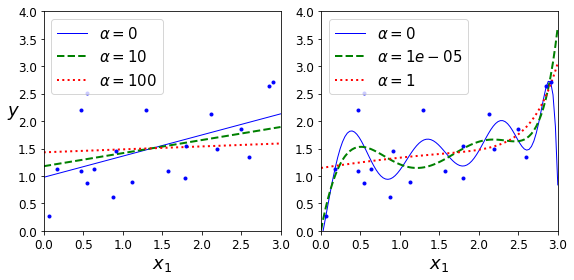

In [ ]:
def plot_model(model_class, polynomial, alphas, **model_kargs):
    for alpha, style in zip(alphas, ("b-", "g--", "r:")):
        model = model_class(alpha, **model_kargs) if alpha > 0 else LinearRegression()
        if polynomial:
            model = Pipeline([
                    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
                    ("std_scaler", StandardScaler()),
                    ("regul_reg", model),
                ])
        model.fit(X, y)
        y_new_regul = model.predict(X_new)
        lw = 2 if alpha > 0 else 1
        plt.plot(X_new, y_new_regul, style, linewidth=lw, label=r"$\alpha = {}$".format(alpha))
    plt.plot(X, y, "b.", linewidth=3)
    plt.legend(loc="upper left", fontsize=15)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 3, 0, 4])

plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100), random_state=42) # linear regression
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1), random_state=42) # polynomial regression

save_fig("ridge_regression_plot")
plt.show()

#### L2 regularization using SGD
The penalty hyperparameter sets the type of regularization term to use, in this case, we use `l2`.

In [ ]:
sgd_reg = SGDRegressor(penalty="l2", max_iter=1000, tol=1e-3, random_state=42)
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([1.47012588])

### L1 Regularization

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.802867703827423, tolerance: 0.0009294783355207351
  positive)


Saving figure lasso_regression_plot


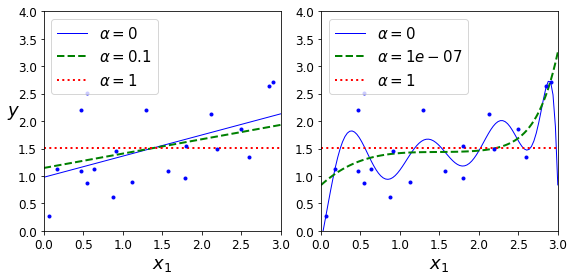

In [ ]:
plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Lasso, polynomial=False, alphas=(0, 0.1, 1), random_state=42) # linear regression
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Lasso, polynomial=True, alphas=(0, 10**-7, 1), random_state=42) # polynomial regression

save_fig("lasso_regression_plot")
plt.show()

In [ ]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([1.53788174])

In [ ]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([1.54333232])

### Early stopping
Early stopping in gradient descent is a form of regularization.

In [ ]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)

X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state=10)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.base import clone

poly_scaler = Pipeline([
        ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
        ("std_scaler", StandardScaler())
    ])

X_train_poly_scaled = poly_scaler.fit_transform(X_train) # transform training data
X_val_poly_scaled = poly_scaler.transform(X_val) # transform validation data

sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005, random_state=42)

minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)  # continues where it left off
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)

Create the graph:

Saving figure early_stopping_plot


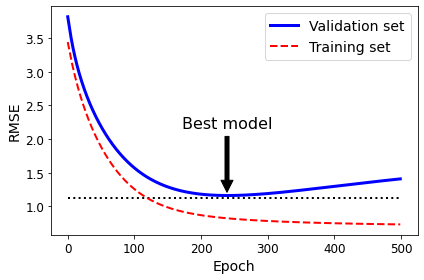

In [ ]:
sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005, random_state=42)

n_epochs = 500
train_errors, val_errors = [], []
for epoch in range(n_epochs):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_train_predict = sgd_reg.predict(X_train_poly_scaled)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    train_errors.append(mean_squared_error(y_train, y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))

best_epoch = np.argmin(val_errors)
best_val_rmse = np.sqrt(val_errors[best_epoch])

plt.annotate('Best model',
             xy=(best_epoch, best_val_rmse),
             xytext=(best_epoch, best_val_rmse + 1),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=16,
            )

best_val_rmse -= 0.03  # just to make the graph look better
plt.plot([0, n_epochs], [best_val_rmse, best_val_rmse], "k:", linewidth=2)
plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="Validation set")
plt.plot(np.sqrt(train_errors), "r--", linewidth=2, label="Training set")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("RMSE", fontsize=14)
save_fig("early_stopping_plot")
plt.show()

In [ ]:
best_epoch, best_model

(239,
 SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
              eta0=0.0005, fit_intercept=True, l1_ratio=0.15,
              learning_rate='constant', loss='squared_loss', max_iter=1,
              n_iter_no_change=5, penalty=None, power_t=0.25, random_state=42,
              shuffle=True, tol=-inf, validation_fraction=0.1, verbose=0,
              warm_start=True))

### BGD with Lasso vs. Ridge regularization

In [ ]:
t1a, t1b, t2a, t2b = -1, 3, -1.5, 1.5 # axis range

t1s = np.linspace(t1a, t1b, 500)
t2s = np.linspace(t2a, t2b, 500)
t1, t2 = np.meshgrid(t1s, t2s)
T = np.c_[t1.ravel(), t2.ravel()]
Xr = np.array([[1, 1], [1, -1], [1, 0.5]])
yr = 2 * Xr[:, :1] + 0.5 * Xr[:, 1:]

J = (1/len(Xr) * np.sum((T.dot(Xr.T) - yr.T)**2, axis=1)).reshape(t1.shape)

N1 = np.linalg.norm(T, ord=1, axis=1).reshape(t1.shape)
N2 = np.linalg.norm(T, ord=2, axis=1).reshape(t1.shape)

t_min_idx = np.unravel_index(np.argmin(J), J.shape)
t1_min, t2_min = t1[t_min_idx], t2[t_min_idx]

t_init = np.array([[0.25], [-1]])

Saving figure lasso_vs_ridge_plot


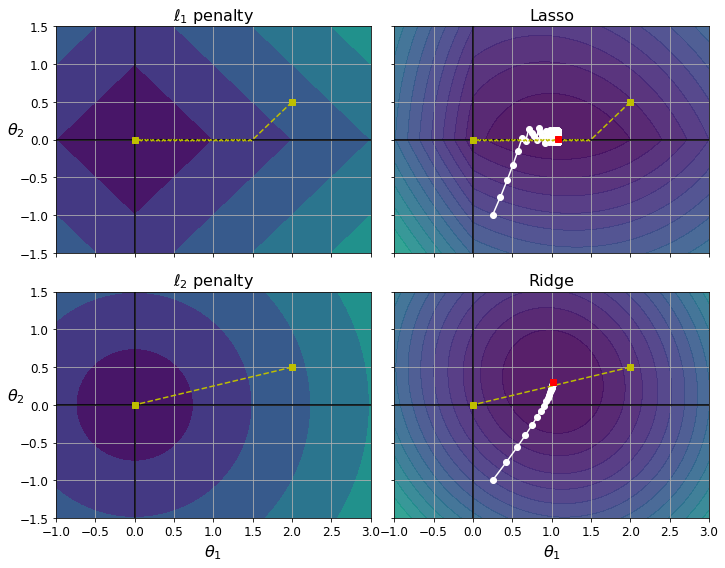

In [ ]:
def bgd_path(theta, X, y, l1, l2, core = 1, eta = 0.05, n_iterations = 200):
    path = [theta]
    for iteration in range(n_iterations):
        gradients = core * 2/len(X) * X.T.dot(X.dot(theta) - y) + l1 * np.sign(theta) + l2 * theta
        theta = theta - eta * gradients
        path.append(theta)
    return np.array(path)

fig, axes = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(10.1, 8))
for i, N, l1, l2, title in ((0, N1, 2., 0, "Lasso"), (1, N2, 0,  2., "Ridge")):
    JR = J + l1 * N1 + l2 * 0.5 * N2**2
    
    tr_min_idx = np.unravel_index(np.argmin(JR), JR.shape)
    t1r_min, t2r_min = t1[tr_min_idx], t2[tr_min_idx]

    levelsJ=(np.exp(np.linspace(0, 1, 20)) - 1) * (np.max(J) - np.min(J)) + np.min(J)
    levelsJR=(np.exp(np.linspace(0, 1, 20)) - 1) * (np.max(JR) - np.min(JR)) + np.min(JR)
    levelsN=np.linspace(0, np.max(N), 10)
    
    path_J = bgd_path(t_init, Xr, yr, l1=0, l2=0)
    path_JR = bgd_path(t_init, Xr, yr, l1, l2)
    path_N = bgd_path(np.array([[2.0], [0.5]]), Xr, yr, np.sign(l1)/3, np.sign(l2), core=0)

    ax = axes[i, 0]
    ax.grid(True)
    ax.axhline(y=0, color='k')
    ax.axvline(x=0, color='k')
    ax.contourf(t1, t2, N / 2., levels=levelsN)
    ax.plot(path_N[:, 0], path_N[:, 1], "y--")
    ax.plot(0, 0, "ys")
    ax.plot(t1_min, t2_min, "ys")
    ax.set_title(r"$\ell_{}$ penalty".format(i + 1), fontsize=16)
    ax.axis([t1a, t1b, t2a, t2b])
    if i == 1:
        ax.set_xlabel(r"$\theta_1$", fontsize=16)
    ax.set_ylabel(r"$\theta_2$", fontsize=16, rotation=0)

    ax = axes[i, 1]
    ax.grid(True)
    ax.axhline(y=0, color='k')
    ax.axvline(x=0, color='k')
    ax.contourf(t1, t2, JR, levels=levelsJR, alpha=0.9)
    ax.plot(path_JR[:, 0], path_JR[:, 1], "w-o")
    ax.plot(path_N[:, 0], path_N[:, 1], "y--")
    ax.plot(0, 0, "ys")
    ax.plot(t1_min, t2_min, "ys")
    ax.plot(t1r_min, t2r_min, "rs")
    ax.set_title(title, fontsize=16)
    ax.axis([t1a, t1b, t2a, t2b])
    if i == 1:
        ax.set_xlabel(r"$\theta_1$", fontsize=16)

save_fig("lasso_vs_ridge_plot")
plt.show()

In the figure above, the background contour plots represent different cost functions.
- **Top left:**  contours represent the $l_1$ loss ($J(\theta_1,\theta_2) = |\theta_1| + |\theta_2|$), which drops linearly as it get closer to any axis For example, if we initialize the model parameters as $\theta_1 = 2$ and $\theta_2 = 0.5$, then running gradient descent will linearly decrement both $\theta_1$ and $\theta_2$. Since $\theta_2$ was closer to the $\theta_2 = 0$ axis, it will be the first to reach $0$. After that, gradient descent will roll down the gutter until it reaches the minimum point.

- **Top right:** contours represent Lasso's cost function (MSE cost function plus an $l_1$ loss). White path represents the gradient descent starting from $\theta_1 = 0.25$ and $\theta_2 = -1$. Once again, both the parameters gets decremented linearly. Once $\theta_2$ reaches $0$, we can see it bouncing above and below $0$, due to de fact that there is a discontinuity point at $0$ (the derivative jumps from $-1$ to $1$). By increasing $\alpha$ we would move the global optimum towards $(0,0)$, while if we lower $\alpha$ value, the minimum point would move towards right (in this particular example).

- **Bottom left:** Contours represent the $l_2$ loss ($J(\theta_1,\theta_2) = \sqrt{\theta_1^2 + \theta_2^2}$). The loss decreases with the distance to the origin. Gradient descent initialized at $\theta_1 = 2$ and $\theta_2 = 0.5$, takes a straight path towards $(0,0)$.

- **Bottom right:** contours represent Lasso's cost function (MSE cost function plus an $l_2$ loss). Gradients get smaller as the parameters approach the global optimum, naturally slowing down the gradient and helping convergence (there is no bouncing around, differently from using the $l_1$ norm). Increasing $\alpha$ causes the parameters to get closer to the origin, but withouth getting complitely eliminated.